## Rating Prediction 

In [ ]:
# imp libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Bhushan0130/Internship/main/Rating_project/Rating_data.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,Review_Title,Reiew_Text,Ratings
0,0,0,"Japanese efficiency in design, functionality a...",This is possibly going to be a game changer. M...,5 star
1,1,1,A good lightweight laptop with some future usa...,This is really cool laptop with top notch perf...,5 star
2,2,2,Compact and powerful,I have been using Fujitsu UH-X 11th (i7) gener...,5 star
3,3,3,Super light feature packed well built laptop,If you have the budget and want a no nonsense ...,5 star
4,4,4,Excellent Product,I brought this Laptop 3 days back. Excellent p...,5 star


In [ ]:
# Remove column if dataset is having extrac columns

df.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0'], inplace = True)

In [ ]:
df.head()

,Review_Title,Reiew_Text,Ratings
0,"Japanese efficiency in design, functionality a...",This is possibly going to be a game changer. M...,5 star
1,A good lightweight laptop with some future usa...,This is really cool laptop with top notch perf...,5 star
2,Compact and powerful,I have been using Fujitsu UH-X 11th (i7) gener...,5 star
3,Super light feature packed well built laptop,If you have the budget and want a no nonsense ...,5 star
4,Excellent Product,I brought this Laptop 3 days back. Excellent p...,5 star


In [ ]:
print('Shape of dataset:', df.shape)

# Shape of dataset: (33285, 3)

Shape of dataset: (33285, 3)


In [ ]:
df.Ratings.value_counts()  # value count of label column

5                     13367
4                      4468
5.0 out of 5 stars     2646
1.0 out of 5 stars     2106
4.0 out of 5 stars     1931
3.0 out of 5 stars     1702
1                      1622
2.0 out of 5 stars     1520
3                      1398
2                       574
5 star                   72
4 star                   35
1 star                   24
3 star                   18
2 star                   13
Name: Ratings, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33285 entries, 0 to 33284
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_Title  31496 non-null  object
 1   Reiew_Text    31445 non-null  object
 2   Ratings       31496 non-null  object
dtypes: object(3)
memory usage: 780.2+ KB


### Null value checking

In [ ]:
df.isnull().sum()

Review_Title    1789
Reiew_Text      1840
Ratings         1789
dtype: int64

In [ ]:
df.isnull().sum().sum()

# 5418

5418

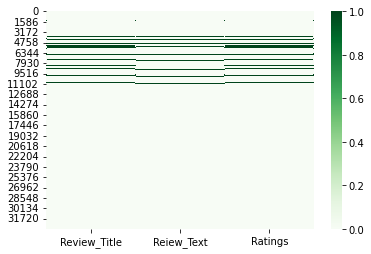

In [ ]:
sns.heatmap(df.isnull(), cmap = 'Greens')

In [ ]:
df.dropna(inplace = True) 

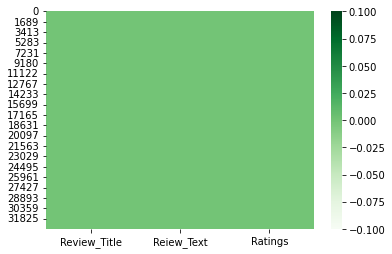

In [ ]:
sns.heatmap(df.isnull(), cmap = 'Greens')

In [ ]:
df.shape

(30780, 3)

In [ ]:
data_loss = (33285 - df.shape[0])/ 33285 *100
data_loss

# Removing null values leading to give 7.5 percent data loss, which is okay

7.525912573231184

## Data Preprocessing

In [ ]:
df.Ratings.unique()

array(['5 star', '4 star', '3 star', '1 star', '2 star',
       '2.0 out of 5 stars', '3.0 out of 5 stars', '1.0 out of 5 stars',
       '5.0 out of 5 stars', '4.0 out of 5 stars', '1', '2', '5', '3',
       '4'], dtype=object)

In [ ]:
df['Ratings'].replace( {'5 star': 5, '4 star':4, '3 star':3, '1 star':1, '2 star':2 }, inplace = True )
df.Ratings.unique()

array([5, 4, 3, 1, 2, '2.0 out of 5 stars', '3.0 out of 5 stars',
       '1.0 out of 5 stars', '5.0 out of 5 stars', '4.0 out of 5 stars',
       '1', '2', '5', '3', '4'], dtype=object)

In [ ]:
df['Ratings'].replace( {'2.0 out of 5 stars': 2, '3.0 out of 5 stars':3, '1.0 out of 5 stars':1, '5.0 out of 5 stars':5,
                        '4.0 out of 5 stars':4, '1':1, '2':2, '5':5, '3':3, '4':4 }, inplace = True )
df.Ratings.unique()

# Target Column converted into 5, 4, 3, 2, 1 class

array([5, 4, 3, 1, 2])

In [ ]:
df.Ratings.value_counts()

# 5    15888
# 4     6290
# 1     3597
# 3     3002
# 2     2003

5    15888
4     6290
1     3597
3     3002
2     2003
Name: Ratings, dtype: int64

In [ ]:
# Ratio:
print('5 :' ,  round((df[df.Ratings == 5].shape[0] / df.shape[0])*100, 2), '%'  )
print('4 :' ,  round((df[df.Ratings == 4].shape[0] / df.shape[0])*100, 2), '%'  )
print('3 :' ,  round((df[df.Ratings == 3].shape[0] / df.shape[0])*100, 2), '%'  )
print('2 :' ,  round((df[df.Ratings == 2].shape[0] / df.shape[0])*100, 2), '%'  )
print('1 :' ,  round((df[df.Ratings == 1].shape[0] / df.shape[0])*100, 2), '%'  )


# 5 : 51.62 %
# 4 : 20.44 %
# 3 : 9.75 %
# 2 : 6.51 %
# 1 : 11.69 %

5 : 51.62 %
4 : 20.44 %
3 : 9.75 %
2 : 6.51 %
1 : 11.69 %


In [ ]:
df.columns

# Index(['Review_Title', 'Reiew_Text', 'Ratings'], dtype='object')

Index(['Review_Title', 'Reiew_Text', 'Ratings'], dtype='object')

In [ ]:
# New column for length of message
df['Length of Title'] = df['Review_Title'].str.len()
df['Length of Text'] = df['Reiew_Text'].str.len()

In [ ]:
df.head()

,Review_Title,Reiew_Text,Ratings,Length of Title,Length of Text
0,"Japanese efficiency in design, functionality a...",This is possibly going to be a game changer. M...,5,59,2298
1,A good lightweight laptop with some future usa...,This is really cool laptop with top notch perf...,5,57,1817
2,Compact and powerful,I have been using Fujitsu UH-X 11th (i7) gener...,5,20,914
3,Super light feature packed well built laptop,If you have the budget and want a no nonsense ...,5,44,431
4,Excellent Product,I brought this Laptop 3 days back. Excellent p...,5,17,431


In [ ]:
# Converting all msges into lower case

df['Review_Title'] = df['Review_Title'].apply(lambda x:x.lower())
df['Reiew_Text'] = df['Reiew_Text'].apply(lambda x:x.lower())
df.head()

,Review_Title,Reiew_Text,Ratings,Length of Title,Length of Text
0,"japanese efficiency in design, functionality a...",this is possibly going to be a game changer. m...,5,59,2298
1,a good lightweight laptop with some future usa...,this is really cool laptop with top notch perf...,5,57,1817
2,compact and powerful,i have been using fujitsu uh-x 11th (i7) gener...,5,20,914
3,super light feature packed well built laptop,if you have the budget and want a no nonsense ...,5,44,431
4,excellent product,i brought this laptop 3 days back. excellent p...,5,17,431


In [ ]:
# Replace email address with email:[
df['Review_Title'] = df['Review_Title'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'email_address')
df['Reiew_Text'] = df['Reiew_Text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'email_address')

In [ ]:
# Replace URL with 'webaddress'
df['Review_Title'] = df['Review_Title'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')
df['Reiew_Text'] = df['Reiew_Text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')

In [ ]:
# Replace money symbols with 'moneysymb' (£ can be typed with ALT key + 156)
df['Review_Title'] = df['Review_Title'].str.replace(r'£|\$', 'dollers')
df['Reiew_Text'] = df['Reiew_Text'].str.replace(r'£|\$', 'dollers')

In [ ]:
# Replace 10 digit phone numbers (formats include paranthesis spaces, no spaces, dashed) with 'phonenumber'
df['Review_Title'] = df['Review_Title'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phone_number')
df['Reiew_Text'] = df['Reiew_Text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phone_number')

In [ ]:
# Replace numbers with 'number'
df['Review_Title'] = df['Review_Title'].str.replace(r'\d+(\.\d+)?', 'number')
df['Reiew_Text'] = df['Reiew_Text'].str.replace(r'\d+(\.\d+)?', 'number')

In [ ]:
# Remove punctuation
df['Review_Title'] = df['Review_Title'].str.replace(r'[^\w\d\s]', ' ')
df['Reiew_Text'] = df['Reiew_Text'].str.replace(r'[^\w\d\s]', ' ')

In [ ]:
# Replace whitespace between terms with a single space:
df['Review_Title'] = df['Review_Title'].str.replace(r'\s+', ' ')
df['Reiew_Text'] = df['Reiew_Text'].str.replace(r'\s+', ' ')

In [ ]:
# Remove leading and trailing whitespace
df['Review_Title'] = df['Review_Title'].str.replace(r'^\s+|\s+?$', ' ')
df['Reiew_Text'] = df['Reiew_Text'].str.replace(r'^\s+|\s+?$', ' ')

In [ ]:
# Remove stopwords
import nltk
nltk.download('stopwords')

import string
from nltk.corpus import stopwords
stop_words = stopwords.words('english') + ['u', 'ur', '4', '2','im','dont', 'doin', 'ure']
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

In [ ]:
df['Review_Title'] = df['Review_Title'].apply(lambda x : ' '.join(word for word in x.split() if word not in stop_words ))
df['Reiew_Text'] = df['Reiew_Text'].apply(lambda x : ' '.join(word for word in x.split() if word not in stop_words ))

In [ ]:
df.head()

,Review_Title,Reiew_Text,Ratings,Length of Title,Length of Text
0,japanese efficiency design functionality minim...,possibly going game changer husband using fuji...,5,59,2298
1,good lightweight laptop future usage concerns,really cool laptop top notch performance found...,5,57,1817
2,compact powerful,using fujitsu uh x numberth inumber generation...,5,20,914
3,super light feature packed well built laptop,budget want nonsense super portable laptop wor...,5,44,431
4,excellent product,brought laptop number days back excellent prod...,5,17,431


In [ ]:
# New column length after removing unwanted crupt data
df['Len of clean Review_Title'] = df.Review_Title.str.len()
df['Len of clean Reiew_Text'] = df.Reiew_Text.str.len()

In [ ]:
df.head()

,Review_Title,Reiew_Text,Ratings,Length of Title,Length of Text,Len of clean Review_Title,Len of clean Reiew_Text
0,japanese efficiency design functionality minim...,possibly going game changer husband using fuji...,5,59,2298,51,1459
1,good lightweight laptop future usage concerns,really cool laptop top notch performance found...,5,57,1817,45,1200
2,compact powerful,using fujitsu uh x numberth inumber generation...,5,20,914,16,676
3,super light feature packed well built laptop,budget want nonsense super portable laptop wor...,5,44,431,44,297
4,excellent product,brought laptop number days back excellent prod...,5,17,431,17,302


### Review text Distribution before Cleaning

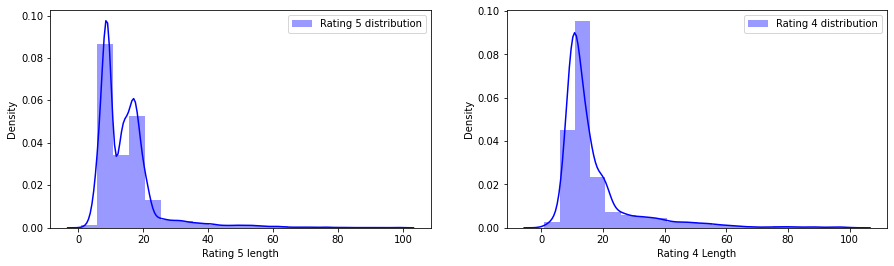

In [ ]:
f, ax = plt.subplots(nrows = 1, ncols = 2 ,figsize = (15,4))

sns.distplot( df[df['Ratings'] ==5]['Length of Title'], bins = 20 , ax = ax[0], label = 'Rating 5 distribution', color = 'b' )
ax[0].set_xlabel('Rating 5 length')
ax[0].legend()


sns.distplot( df[df['Ratings']==4]['Length of Title'], bins = 20, ax = ax[1], label = 'Rating 4 distribution', color = 'b')
ax[1].set_xlabel('Rating 4 Length')
ax[1].legend()

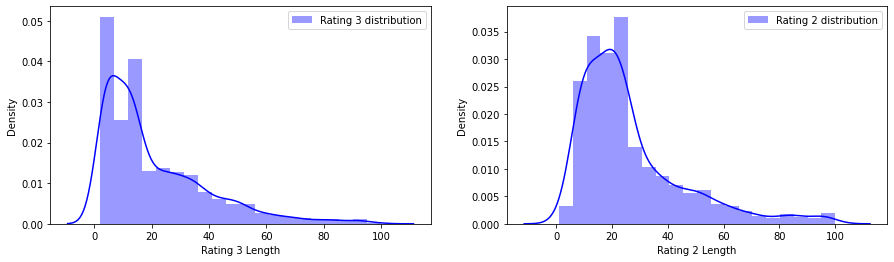

In [ ]:
f, ax = plt.subplots(nrows = 1, ncols = 2 ,figsize = (15,4))

sns.distplot( df[df['Ratings']==3]['Length of Title'], bins = 20, ax = ax[0], label = 'Rating 3 distribution', color = 'b')
ax[0].set_xlabel('Rating 3 Length')
ax[0].legend()

sns.distplot( df[df['Ratings']==2]['Length of Title'], bins = 20, ax = ax[1], label = 'Rating 2 distribution', color = 'b')
ax[1].set_xlabel('Rating 2 Length')
ax[1].legend()



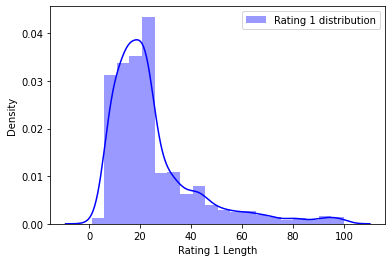

In [ ]:
ax = sns.distplot( df[df['Ratings']==1]['Length of Title'], bins = 20, label = 'Rating 1 distribution', color = 'b')
ax.set_xlabel('Rating 1 Length')
ax.legend()

In [ ]:
df.columns

Index(['Review_Title', 'Reiew_Text', 'Ratings', 'Length of Title',
       'Length of Text', 'Len of clean Review_Title',
       'Len of clean Reiew_Text'],
      dtype='object')

### Message distribution after cleaning

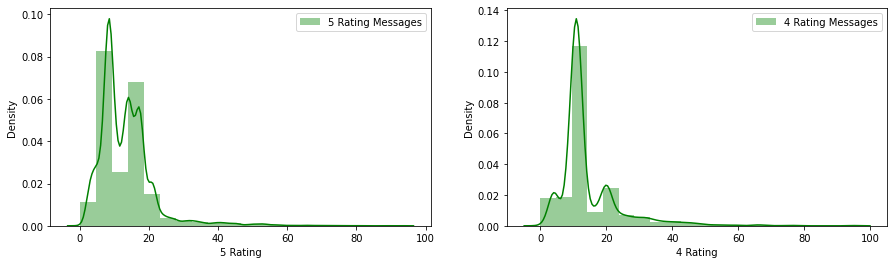

In [ ]:
f, ax = plt.subplots(1,2,figsize = (15,4))

sns.distplot( df[df['Ratings'] ==5]['Len of clean Review_Title'] , bins = 20, ax = ax[0], label = '5 Rating Messages', color = 'g' )

ax[0].set_xlabel('5 Rating')
ax[0].legend()


sns.distplot( df[df['Ratings']==4]['Len of clean Review_Title'], bins = 20, ax = ax[1], label = '4 Rating Messages', color = 'g')
ax[1].set_xlabel('4 Rating')
ax[1].legend()

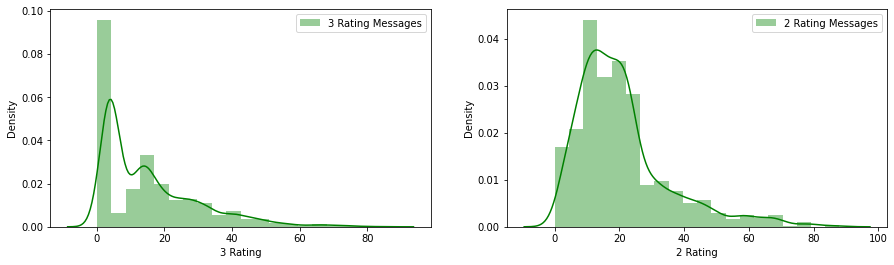

In [ ]:
f, ax = plt.subplots(1,2,figsize = (15,4))

sns.distplot( df[df['Ratings'] ==3]['Len of clean Review_Title'] , bins = 20, ax = ax[0], label = '3 Rating Messages', color = 'g' )
ax[0].set_xlabel('3 Rating')
ax[0].legend()


sns.distplot( df[df['Ratings']==2]['Len of clean Review_Title'], bins = 20, ax = ax[1], label = '2 Rating Messages', color = 'g')
ax[1].set_xlabel('2 Rating')
ax[1].legend()

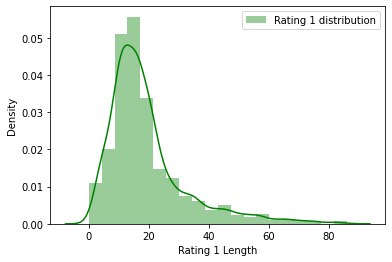

In [ ]:
ax = sns.distplot( df[df['Ratings']==1]['Len of clean Review_Title'], bins = 20, label = 'Rating 1 distribution', color = 'g')
ax.set_xlabel('Rating 1 Length')
ax.legend()

In [ ]:
df['Reivew'] = df['Review_Title'] + ' ' + df['Reiew_Text']
df.head()

# Review column is combination of Review title and Review text

,Review_Title,Reiew_Text,Ratings,Length of Title,Length of Text,Len of clean Review_Title,Len of clean Reiew_Text,Reivew
0,japanese efficiency design functionality minim...,possibly going game changer husband using fuji...,5,59,2298,51,1459,japanese efficiency design functionality minim...
1,good lightweight laptop future usage concerns,really cool laptop top notch performance found...,5,57,1817,45,1200,good lightweight laptop future usage concerns ...
2,compact powerful,using fujitsu uh x numberth inumber generation...,5,20,914,16,676,compact powerful using fujitsu uh x numberth i...
3,super light feature packed well built laptop,budget want nonsense super portable laptop wor...,5,44,431,44,297,super light feature packed well built laptop b...
4,excellent product,brought laptop number days back excellent prod...,5,17,431,17,302,excellent product brought laptop number days b...


In [ ]:
df['Reivew'][4]

'excellent product brought laptop number days back excellent product typical japanese design simplicity advantage full connectivity require special adaptor convert hdmi usb like high end laptop laptop surprisingly much light weight keyboard design excellent using desktop good choice price laptop brand manufactured japan'

In [ ]:
df.drop(columns = ['Review_Title', 'Reiew_Text' ], inplace = True)

**Getting sense of loud words in spam**

In [ ]:
# !python -m pip install --upgrade pip
# !pip install wordcloud

In [ ]:
from wordcloud import WordCloud 
df.columns

Index(['Ratings', 'Length of Title', 'Length of Text',
       'Len of clean Review_Title', 'Len of clean Reiew_Text', 'Reivew'],
      dtype='object')

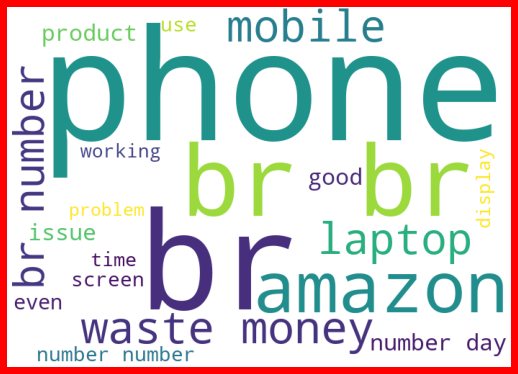

In [ ]:
spams = df['Reivew'][df['Ratings'] ==1]

spam_cloud = WordCloud(width = 700, height =500, background_color='white', max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,5), facecolor = 'r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

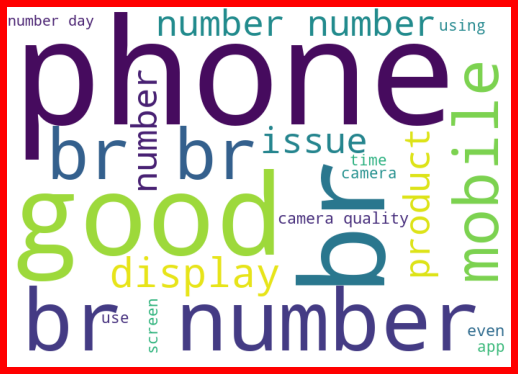

In [ ]:
spams = df['Reivew'][df['Ratings'] ==2]

spam_cloud = WordCloud(width = 700, height =500, background_color='white', max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,5), facecolor = 'r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

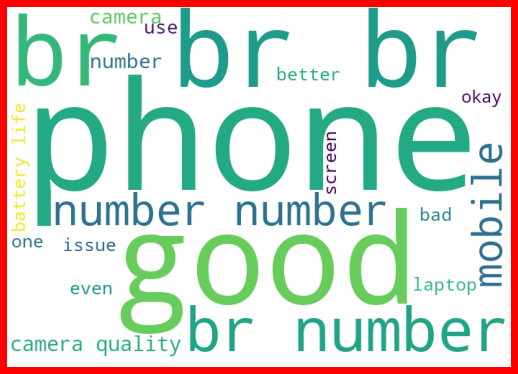

In [ ]:
spams = df['Reivew'][df['Ratings'] ==3]

spam_cloud = WordCloud(width = 700, height =500, background_color='white', max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,5), facecolor = 'r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

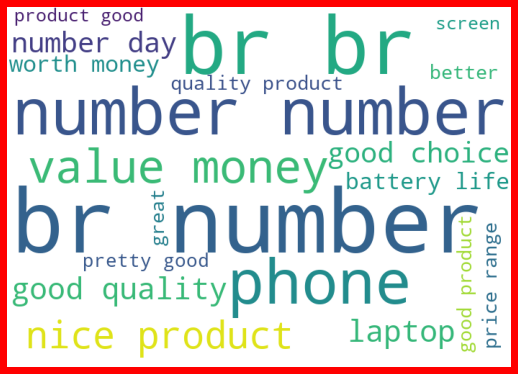

In [ ]:
spams = df['Reivew'][df['Ratings'] ==4]

spam_cloud = WordCloud(width = 700, height =500, background_color='white', max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,5), facecolor = 'r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

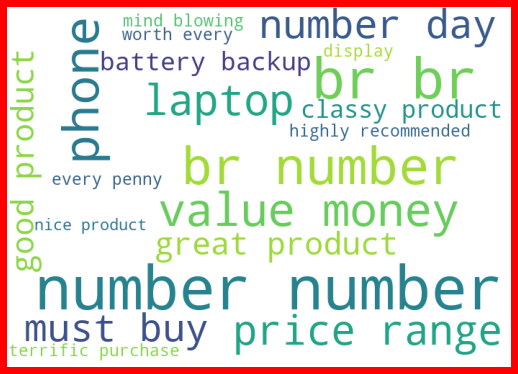

In [ ]:
spams = df['Reivew'][df['Ratings'] ==5]

spam_cloud = WordCloud(width = 700, height =500, background_color='white', max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,5), facecolor = 'r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### TfidVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
tf_vec = TfidfVectorizer()
df.columns

Index(['Ratings', 'Length of Title', 'Length of Text',
       'Len of clean Review_Title', 'Len of clean Reiew_Text', 'Reivew'],
      dtype='object')

In [ ]:
tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(df['Reivew'])
x = features
y = df['Ratings']

#### To balance the dataset apply SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
x, y = smote.fit_resample(x,y)

In [ ]:
y.value_counts()

5    15888
4    15888
3    15888
1    15888
2    15888
Name: Ratings, dtype: int64

## Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
def ML_Model (algorithms, x, y ):  
    
    for algo in algorithms :
        max_acc = 0
        random_s = 0

        # for i in range(0, 50):
        #     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        #     model = algo
        #     model.fit(x_train, y_train)
        #     model_pred = model.predict(x_test)
        #     acc = accuracy_score(model_pred, y_test)
    
        #     if acc > max_acc:
        #         max_acc = acc
        #         random_s = i
        # print('\n______________________________________________________________________________')
        # print(algo ,' is giving best accurancy', max_acc, 'on random state of', random_s )
# 
        print(algo )
            # train the model
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 51)
        model = algo
        model.fit(x_train, y_train)
    
        # predict the training set
        pred = model.predict(x_test)
        m_pred = model.predict(x_train)
    
        training = accuracy_score(m_pred, y_train)
        testing = accuracy_score(pred, y_test)
        
        print('Training accuracy is : ', training)
        print('Testing accuracy is :', testing) 
    
        print('-------------------------------------------------------------------------------')
        print('Classification Report: \n', classification_report(pred, y_test) )
        print('Confusion Matrix: \n', confusion_matrix(pred, y_test) )
        print('--------------------------------------------------------------------------------')
        print('Cross value score')
    
        # perform cross-validation
        for i in range(2, 5):
            cv_score = cross_val_score(model, x, y, cv = i ).mean()
            print('cv score',  cv_score ,'at', i, 'cross fold')
        print('--------------------------------------------------------------------------------')
        # print('AUC-ROC Score')
        # auc_score = roc_auc_score( y_test, pred)
        # print('auc_score: ', auc_score)

In [ ]:
lr = LogisticRegression()
sgd = SGDClassifier()
random = RandomForestClassifier()
dtc = DecisionTreeClassifier()
gbc = GradientBoostingClassifier()
naive = MultinomialNB()
xgb = XGBClassifier()
bernoulli = BernoulliNB()

In [ ]:
models = [lr ]
ML_Model(models, x, y)

Training accuracy is :  0.9279959718026183
Testing accuracy is : 0.909197717354817
-------------------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.95      0.95      4819
           2       0.95      0.92      0.93      4918
           3       0.89      0.89      0.89      4786
           4       0.87      0.87      0.87      4820
           5       0.88      0.93      0.90      4489

    accuracy                           0.91     23832
   macro avg       0.91      0.91      0.91     23832
weighted avg       0.91      0.91      0.91     23832

Confusion Matrix: 
 [[4559   99  108   20   33]
 [ 148 4513  170   59   28]
 [  43  113 4252  262  116]
 [  15   28  195 4180  402]
 [   3    7   51  264 4164]]
--------------------------------------------------------------------------------
Cross value score
cv score 0.8450906344410876 at 2 cross fold
cv score 0.88002265

In [ ]:
models = [dtc, naive ]
ML_Model(models, x, y)

Training accuracy is :  0.9971227161559488
Testing accuracy is : 0.9125545485062101
-------------------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           1       0.93      0.93      0.93      4768
           2       0.93      0.91      0.92      4830
           3       0.90      0.91      0.90      4735
           4       0.90      0.89      0.90      4828
           5       0.91      0.92      0.91      4671

    accuracy                           0.91     23832
   macro avg       0.91      0.91      0.91     23832
weighted avg       0.91      0.91      0.91     23832

Confusion Matrix: 
 [[4438  147   89   30   64]
 [ 160 4405  155   72   38]
 [  89  110 4299  151   86]
 [  47   61  147 4312  261]
 [  34   37   86  220 4294]]
--------------------------------------------------------------------------------
Cross value score
cv score 0.833257804632427 at 2 cross fold
cv score 0.87606998

In [ ]:
models = [bernoulli]
ML_Model(models, x, y)

Training accuracy is :  0.6456804776291181
Testing accuracy is : 0.6332661967103055
-------------------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           1       0.78      0.78      0.78      4763
           2       0.53      0.90      0.67      2821
           3       0.56      0.81      0.66      3332
           4       0.43      0.73      0.54      2796
           5       0.86      0.41      0.55     10120

    accuracy                           0.63     23832
   macro avg       0.63      0.72      0.64     23832
weighted avg       0.72      0.63      0.63     23832

Confusion Matrix: 
 [[3722  741  246   37   17]
 [ 127 2544   63   60   27]
 [  82  156 2687  220  187]
 [  17  121  211 2037  410]
 [ 820 1198 1569 2431 4102]]
--------------------------------------------------------------------------------
Cross value score
cv score 0.617837361530715 at 2 cross fold
cv score 0.62423212

### Applying boosting Techniques

In [ ]:
models = [random, gbc]
ML_Model(models, x, y)

RandomForestClassifier()
Training accuracy is :  0.9974643936124299
Testing accuracy is : 0.9762084592145015
-------------------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           1       1.00      0.98      0.99      4852
           2       0.99      0.99      0.99      4763
           3       0.98      0.98      0.98      4771
           4       0.96      0.96      0.96      4781
           5       0.95      0.97      0.96      4665

    accuracy                           0.98     23832
   macro avg       0.98      0.98      0.98     23832
weighted avg       0.98      0.98      0.98     23832

Confusion Matrix: 
 [[4753   18   29   16   36]
 [   5 4726   12   10   10]
 [   4    6 4684   42   35]
 [   1    7   35 4589  149]
 [   5    3   16  128 4513]]
--------------------------------------------------------------------------------
Cross value score
cv score 0.9252517623363545 at 2 cros

In [ ]:
models = [ xgb ]
ML_Model(models, x, y)

XGBClassifier()
Training accuracy is :  0.7849949647532729
Testing accuracy is : 0.7742950654582075
-------------------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           1       0.88      0.75      0.81      5633
           2       0.71      0.73      0.72      4626
           3       0.65      0.79      0.71      3896
           4       0.80      0.74      0.77      5153
           5       0.83      0.87      0.85      4524

    accuracy                           0.77     23832
   macro avg       0.77      0.78      0.77     23832
weighted avg       0.78      0.77      0.78     23832

Confusion Matrix: 
 [[4212  908  329   73  111]
 [ 381 3384  600  185   76]
 [  93  284 3092  309  118]
 [  65  171  594 3825  498]
 [  17   13  161  393 3940]]
--------------------------------------------------------------------------------
Cross value score
cv score 0.7419436052366566 at 2 cross fold
cv

### Ensemble Technique of RandomForestClassifier

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 51 )

Hyper Parameter Tuning

In [ ]:
# parameter = {'max_depth' : [80, 90, 100, 110],
#              'min_samples_leaf': [3, 4, 5],
#              'criterion' : ['gini', 'entropy'],
#              'min_samples_split': [8, 10, 12],
#              'n_estimators': [100, 200, 300, 1000]  } 

# Tried to check with these above mentioned parameters but fail to do, due to so much time consumption, approx 9 to 12 hours
# or more than that

parameter = {'criterion' : ['gini', 'entropy'],
             'n_estimators': [100, 200]  } 

In [ ]:
gcv = GridSearchCV(estimator = RandomForestClassifier(), param_grid = parameter, cv = 3)
gcv.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 200]})

In [ ]:
gcv.best_params_

{'criterion': 'entropy', 'n_estimators': 200}

In [ ]:
ensemble = RandomForestClassifier(criterion = 'entropy', n_estimators = 200)
models = [ensemble]
ML_Model(models, x, y)

RandomForestClassifier(criterion='entropy', n_estimators=200)
Training accuracy is :  0.9974643936124299
Testing accuracy is : 0.9769217858341726
-------------------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           1       1.00      0.98      0.99      4856
           2       0.99      0.99      0.99      4758
           3       0.98      0.98      0.98      4771
           4       0.96      0.96      0.96      4780
           5       0.95      0.97      0.96      4667

    accuracy                           0.98     23832
   macro avg       0.98      0.98      0.98     23832
weighted avg       0.98      0.98      0.98     23832

Confusion Matrix: 
 [[4757   21   29   16   33]
 [   5 4721   16    8    8]
 [   1    5 4683   44   38]
 [   0    6   35 4598  141]
 [   5    7   13  119 4523]]
--------------------------------------------------------------------------------
Cross value score


In [ ]:
# done

Final Model (RandomForestClassifer)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 51)
final_model = RandomForestClassifier(criterion='entropy', n_estimators=200)
final_model.fit(x_train, y_train)
predict_train = final_model.predict(x_train)
predict_test = final_model.predict(x_test)

training = accuracy_score(predict_train, y_train)
testing = accuracy_score(predict_test, y_test)

print('the training accuracy is :', training)
print('the testing accuracy is :'  , testing) 
print('_________________________________________________________________')
print('Classification Report: \n', classification_report(predict_test, y_test) )
print('Confusion Matrix: \n', confusion_matrix(predict_test, y_test) )
print('___________________________________________________________________')

the training accuracy is : 0.9971946482520501
the testing accuracy is : 0.9770057066129574
_________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           1       1.00      0.98      0.99      4844
           2       0.99      0.99      0.99      4766
           3       0.98      0.98      0.98      4756
           4       0.96      0.96      0.96      4788
           5       0.96      0.97      0.96      4678

    accuracy                           0.98     23832
   macro avg       0.98      0.98      0.98     23832
weighted avg       0.98      0.98      0.98     23832

Confusion Matrix: 
 [[4750   16   32   20   26]
 [   4 4727   15    9   11]
 [   1    5 4680   40   30]
 [   6    7   32 4597  146]
 [   7    5   17  119 4530]]
___________________________________________________________________


In [ ]:
# perform cross-validation
print('Cross value score')
cv_score = cross_val_score(RandomForestClassifier(criterion='entropy', n_estimators=200), x, y, cv = 3 ).mean()
print('cv score',  cv_score )
print('--------------------------------------------------------------------------------')

Cross value score
cv score 0.9507175226586102
--------------------------------------------------------------------------------


### Deploy the model

In [ ]:
import pickle
filename = 'rating_project.pkl'                 # model name 
pickle.dump(final_model, open(filename, 'wb'))         # operation to deploy model

### Loading model

In [ ]:
load_model =  pickle.load(open('rating_project.pkl', 'rb'))    # loading deployed model
result = load_model.score(x_test, y_test)                            
print(result) 

0.9770057066129574


### Conclusion

In [ ]:
original = np.array(y_test)
predicted = np.array(load_model.predict(x_test))  
# convert columns in to np.array 

In [ ]:
print(predicted.shape)
print(original.shape)
print(x_test.shape)
print(y_test.shape)

(23832,)
(23832,)
(23832, 13629)
(23832,)


In [ ]:
conclusion = pd.DataFrame({'Original fraud_reported': original, 'Predicted fraud_reported': predicted}, index = range(len(original)))
# Dataframe creation

In [ ]:
pd.set_option('display.max_rows', None)  # To maximize the rows
conclusion.head()

,Original fraud_reported,Predicted fraud_reported
0,1,1
1,4,4
2,1,1
3,2,2
4,4,4


In [ ]:
conclusion.sample(10)

,Original fraud_reported,Predicted fraud_reported
14384,4,4
6465,3,3
17223,3,3
17663,4,4
3485,3,3
11480,1,1
21600,5,5
18061,5,5
10124,5,5
3477,5,5
